In [5]:
# Bibliotecas utilizadas e últimos 3 dígitos da matrícula

import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

mat1 = [6, 1, 1]

f(x) = 71.44172001911134 + (1.9247109412326795 * x)
f(mat1[2] + 0.5): 74.32878643096036
Coeficiente r2 de ajuste: 0.9023424261856497


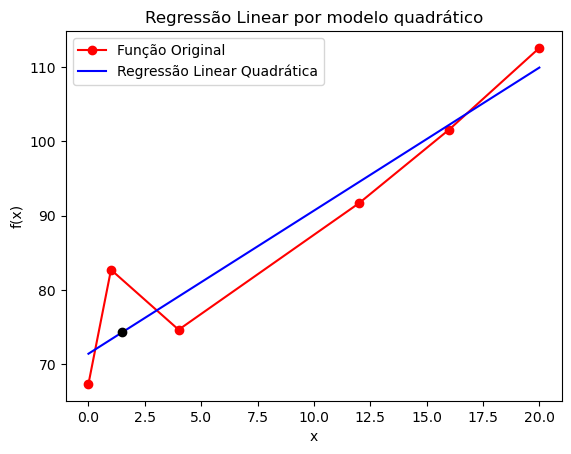

In [6]:
# Questão 1
x = [0, mat1[1], 4, 12, 16, 20]
y = [67.38, 82.74, 74.67, 91.69, 101.60, 112.58]
reta = [0 for _ in range(len(x))]

soma_x_y = (sum([x[i]*y[i] for i in range(len(x))]))
soma_x = sum(x)
soma_y = sum(y)
soma_x_quadrado = sum([x[i]**2 for i in range(len(x))])

n = len(x)
media_x = np.mean(x)
media_y = np.mean(y)

numerador = (n * soma_x_y) - (soma_x * soma_y)

angular = ((n * soma_x_y) - (soma_x * soma_y)) / ((n * soma_x_quadrado) - (soma_x ** 2))
linear = media_y - (angular * media_x)

soma_t = 0
soma_r = 0

for i in range(0, n):
	soma_r += (y[i] - linear - angular * x[i]) ** 2
	soma_t += (y[i] - media_y) ** 2
	reta[i] = linear + angular * x[i]

r_2 = (soma_t - soma_r) / (soma_t)

f = lambda x : linear + angular * x

print(f"f(x) = {linear} + ({angular} * x)")
print(f"f(mat1[2] + 0.5): {f(mat1[2] + 0.5)}")
print(f"Coeficiente r2 de ajuste: {r_2}")

plt.plot(x, y, color='red', marker='o', label="Função Original")
plt.plot(x, reta, color='blue', label="Regressão Linear Quadrática")
plt.plot((mat1[2] + 0.5), f(mat1[2] + 0.5), color='black', marker='o')

plt.title("Regressão Linear por modelo quadrático")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.show()

# Questão 1
# f(mat1[2] + 0.5): 74.32878643096036
# coeficiente r2 de ajuste: 0.9023424261856497

61012.80997530864


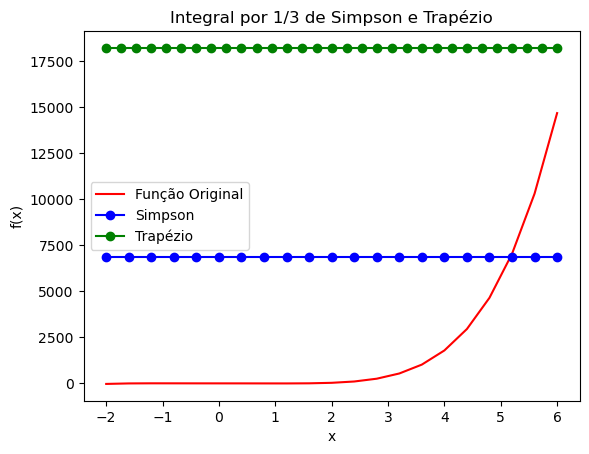

Regra de 1/3 de Simpson com 20 intervalos: 6869.188352000002
Regra do Trapézio com 30 intervalos: 18223.94932674897
Integral definida: 14242.66666666667


In [ ]:
# Questão 2

f = lambda x : (1 - x - 4 * (x ** 3) + 2 * (x ** 5))

intervalo_trapezio = 30
x_trapezio = np.linspace(-2, mat1[0], intervalo_trapezio+1)
y_trapezio = np.zeros(intervalo_trapezio+1)

for i in range(len(x_trapezio)):
	soma = 0

	for j in range(intervalo_trapezio-1):
		soma += f(x_trapezio[j])

	y_trapezio[i] = (mat1[0] + 2) * (f(-2) + 2 * soma + f(mat1[0])) / (2 * (intervalo_trapezio))

intervalo_simpson = 20
x_simpson = np.linspace(-2, mat1[0], intervalo_simpson+1)
y_simpson = np.zeros(intervalo_simpson+1)

for i in range(len(x_simpson)):
	soma_par = 0
	soma_impar = 0

	for j in range(2, intervalo_simpson-3, 2):
		soma_par += f(x_simpson[j])

	for j in range(1, intervalo_simpson-2, 2):
		soma_impar += f(x_simpson[j])

	y_simpson[i] = (mat1[0] + 2) * (f(-2) + 4 * soma_impar + 2 * soma_par + f(mat1[0])) / (3*intervalo_simpson)

plt.plot(x_simpson, f(x_simpson), color='red', label="Função Original")
plt.plot(x_simpson, y_simpson, color='blue', marker='o', label="Simpson")
plt.plot(x_trapezio, y_trapezio, color='green', marker='o', label="Trapézio")

plt.title("Integral por 1/3 de Simpson e Trapézio")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.show()

resultado, erro = quad(f, -2, mat1[0])

print(f"Regra de 1/3 de Simpson com 20 intervalos: {y_simpson[-1]}")
print(f"Regra do Trapézio com 30 intervalos: {y_trapezio[-1]}")
print(f"Integral definida: {resultado}")

# Questão 2
# Regra de 1/3 de Simpson com 20 intervalos: 6869.188352000002
# Regra do Trapézio com 30 intervalos: 11206.81068791221

[0.   0.25 0.5  0.75 1.  ]
Euller: [1.5        1.80618622 2.47815836 3.65882091 5.57162538]
RK de 4ª Ordem: [1.5        1.99438223 2.97457934 4.67492644 7.42351583]


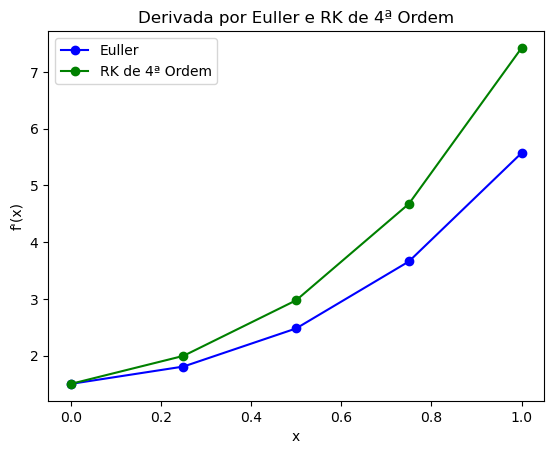

In [ ]:

h = 0.25
steps = 5
x = np.linspace(0, 1, steps)

y_euller = np.zeros(steps)
y_euller[0] = mat1[2] + 0.5

y_rk = np.zeros(steps)
y_rk[0] = mat1[2] + 0.5

phi = lambda x, y : (1 + 4 * x) * np.sqrt(y)

for i in range(len(x) - 1):
	y_euller[i+1] = y_euller[i] + phi(x[i], y_euller[i]) * h

	k1 = phi(x[i], y_rk[i])
	k2 = phi(x[i] + h/2, y_rk[i] + (k1 * h) / 2)
	k3 = phi(x[i] + h/2, y_rk[i] + (k2 * h) / 2)
	k4 = phi(x[i] + h, y_rk[i] + (k3 * h))
	
	y_rk[i+1] = y_rk[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)

print(f"Euller: {y_euller}")
print(f"RK de 4ª Ordem: {y_rk}")

plt.plot(x, y_euller, color='blue', marker='o', label="Euller")
plt.plot(x, y_rk, color='green', marker='o', label="RK de 4ª Ordem")

plt.title("Derivada por Euller e RK de 4ª Ordem")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()

plt.show()

# Questão 3
# Euler: [1.5, 1.80618622, 2.47815836, 3.65882091, 5.57162538]
# RK de 4a ordem clássico: [1.5, 1.99438223, 2.97457934, 4.67492644, 7.42351583]